### Notebook to plot neighborhood sentiment against actual sentiment

In [2]:
##import packages
import pandas as pd
import numpy as np
import os
from plotnine import *
import scipy.stats as stats 
import warnings
warnings.filterwarnings("ignore")
import re
import matplotlib.pyplot as plt

In [3]:
##open all crime csvs to concat
crime_2024 = pd.read_csv("../../data/open_data_dc/crime_2024.csv")
crime_2023 = pd.read_csv("../../data/open_data_dc/crime_2023.csv")
crime_2022 = pd.read_csv("../../data/open_data_dc/crime_2022.csv")
crime_2021 = pd.read_csv("../../data/open_data_dc/crime_2021.csv")
crime_2020 = pd.read_csv("../../data/open_data_dc/crime_2020.csv")
crime_2019 = pd.read_csv("../../data/open_data_dc/crime_2019.csv")

In [4]:
##create a list of dataframe to concat
dataframes = [crime_2024, crime_2023, crime_2022, crime_2021, crime_2020, crime_2019]

In [5]:
##concat the dataframes and show the first few rows
combined_crime = pd.concat(dataframes, ignore_index = True)
combined_crime.head()

,Unnamed: 0,OFFENSE,Name,YEAR,TotalNeighborhoodCrime
0,0,THEFT/OTHER,Shaw,2024,1394
1,1,THEFT/OTHER,Columbia Heights,2024,1545
2,2,THEFT/OTHER,Capitol Hill,2024,1138
3,3,THEFT/OTHER,Adams Morgan,2024,686
4,4,MOTOR VEHICLE THEFT,Anacostia,2024,177


In [6]:
##get the shape of the dataframe
combined_crime.shape

(52262, 5)

In [7]:
##drop the unnamed column and show the first few rows
combined_crime = combined_crime.drop(columns=['Unnamed: 0'])
combined_crime.head()

,OFFENSE,Name,YEAR,TotalNeighborhoodCrime
0,THEFT/OTHER,Shaw,2024,1394
1,THEFT/OTHER,Columbia Heights,2024,1545
2,THEFT/OTHER,Capitol Hill,2024,1138
3,THEFT/OTHER,Adams Morgan,2024,686
4,MOTOR VEHICLE THEFT,Anacostia,2024,177


In [8]:
##open the average sentiments by year file and show the first few rows as a df
sentiments = pd.read_csv("../../data/average_sentiments_by_year_2019.csv")
sentiments.head()

,Unnamed: 0,neighborhood,year,average_sentiment,date
0,4,adams morgan,2019,5.666667,2019-04-01 12:00:00.000000000
1,5,adams morgan,2021,5.775000,2021-07-08 04:48:00.000000000
2,6,adams morgan,2022,3.750000,2022-03-17 12:00:00.000000000
3,7,adams morgan,2023,4.893519,2023-07-21 16:00:00.000000000
4,8,adams morgan,2024,4.875923,2024-06-14 18:40:00.000000000


In [9]:
##remove the unnamed column and show the first few rows
sentiments = sentiments.drop(columns=['Unnamed: 0'])
sentiments.head()

,neighborhood,year,average_sentiment,date
0,adams morgan,2019,5.666667,2019-04-01 12:00:00.000000000
1,adams morgan,2021,5.775000,2021-07-08 04:48:00.000000000
2,adams morgan,2022,3.750000,2022-03-17 12:00:00.000000000
3,adams morgan,2023,4.893519,2023-07-21 16:00:00.000000000
4,adams morgan,2024,4.875923,2024-06-14 18:40:00.000000000


#### Combine true crime and sentiments on crime 

In [11]:
##make sure both dataframes have neighborhood names that are case insensitive
combined_crime['Name_lower'] = combined_crime['Name'].str.lower()
sentiments['Name_lower'] = sentiments['neighborhood'].str.lower()

In [12]:
##merege the crime sentiment and actual crime numbers on neighborhood and year
all_crime_and_sentiment = combined_crime.merge(sentiments, left_on=['Name_lower', 'YEAR'], right_on=['Name_lower'
                                                                                                     , 'year'])

In [13]:
##Show the first few rows
all_crime_and_sentiment.head()

,OFFENSE,Name,YEAR,TotalNeighborhoodCrime,Name_lower,neighborhood,year,average_sentiment,date
0,THEFT/OTHER,Shaw,2024,1394,shaw,shaw,2024,5.664683,2024-06-24 18:40:00.000000000
1,THEFT/OTHER,Columbia Heights,2024,1545,columbia heights,columbia heights,2024,4.836393,2024-06-11 05:20:00.000000000
2,THEFT/OTHER,Capitol Hill,2024,1138,capitol hill,capitol hill,2024,5.838586,2024-06-14 18:40:00.000000000
3,THEFT/OTHER,Adams Morgan,2024,686,adams morgan,adams morgan,2024,4.875923,2024-06-14 18:40:00.000000000
4,MOTOR VEHICLE THEFT,Anacostia,2024,177,anacostia,anacostia,2024,4.352189,2024-05-11 18:40:00.000000000


In [14]:
##Export to a csv
all_crime_and_sentiment.to_csv("../../data/sentiment_and_crime.csv")

#### Clean the data for only one neighborhood 

In [16]:
##show the first few rows of crime in only Shaw 
crime_shaw = combined_crime[combined_crime["Name"] == "Shaw"]
crime_shaw.head()

,OFFENSE,Name,YEAR,TotalNeighborhoodCrime,Name_lower
0,THEFT/OTHER,Shaw,2024,1394,shaw
8,THEFT F/AUTO,Shaw,2024,1394,shaw
15,MOTOR VEHICLE THEFT,Shaw,2024,1394,shaw
23,BURGLARY,Shaw,2024,1394,shaw
31,THEFT F/AUTO,Shaw,2024,1394,shaw


In [17]:
##get only the sentiment on crime in shaw for each year. show the first few rows
sentiments_shaw = sentiments[sentiments["neighborhood"] == "shaw"]
sentiments_shaw.head()

,neighborhood,year,average_sentiment,date,Name_lower
62,shaw,2019,5.833333,2019-06-17 00:00:00.000000000,shaw
63,shaw,2020,8.000000,2020-09-01 00:00:00.000000000,shaw
64,shaw,2021,6.145833,2021-07-01 12:00:00.000000000,shaw
65,shaw,2022,3.807692,2022-08-16 12:00:00.000000000,shaw
66,shaw,2023,4.674663,2023-07-10 10:17:08.571428608,shaw


In [18]:
##combine the dataframes and show the first few rows
merged_df = crime_shaw.merge(sentiments_shaw,left_on="YEAR",right_on="year", how='inner')
merged_df.head()

,OFFENSE,Name,YEAR,TotalNeighborhoodCrime,Name_lower_x,neighborhood,year,average_sentiment,date,Name_lower_y
0,THEFT/OTHER,Shaw,2024,1394,shaw,shaw,2024,5.664683,2024-06-24 18:40:00.000000000,shaw
1,THEFT F/AUTO,Shaw,2024,1394,shaw,shaw,2024,5.664683,2024-06-24 18:40:00.000000000,shaw
2,MOTOR VEHICLE THEFT,Shaw,2024,1394,shaw,shaw,2024,5.664683,2024-06-24 18:40:00.000000000,shaw
3,BURGLARY,Shaw,2024,1394,shaw,shaw,2024,5.664683,2024-06-24 18:40:00.000000000,shaw
4,THEFT F/AUTO,Shaw,2024,1394,shaw,shaw,2024,5.664683,2024-06-24 18:40:00.000000000,shaw


In [19]:
##convert the year column to a string for graphing purposes
merged_df['year'] = merged_df['year'].astype(str)

#### Plot crime data for a neighborhood

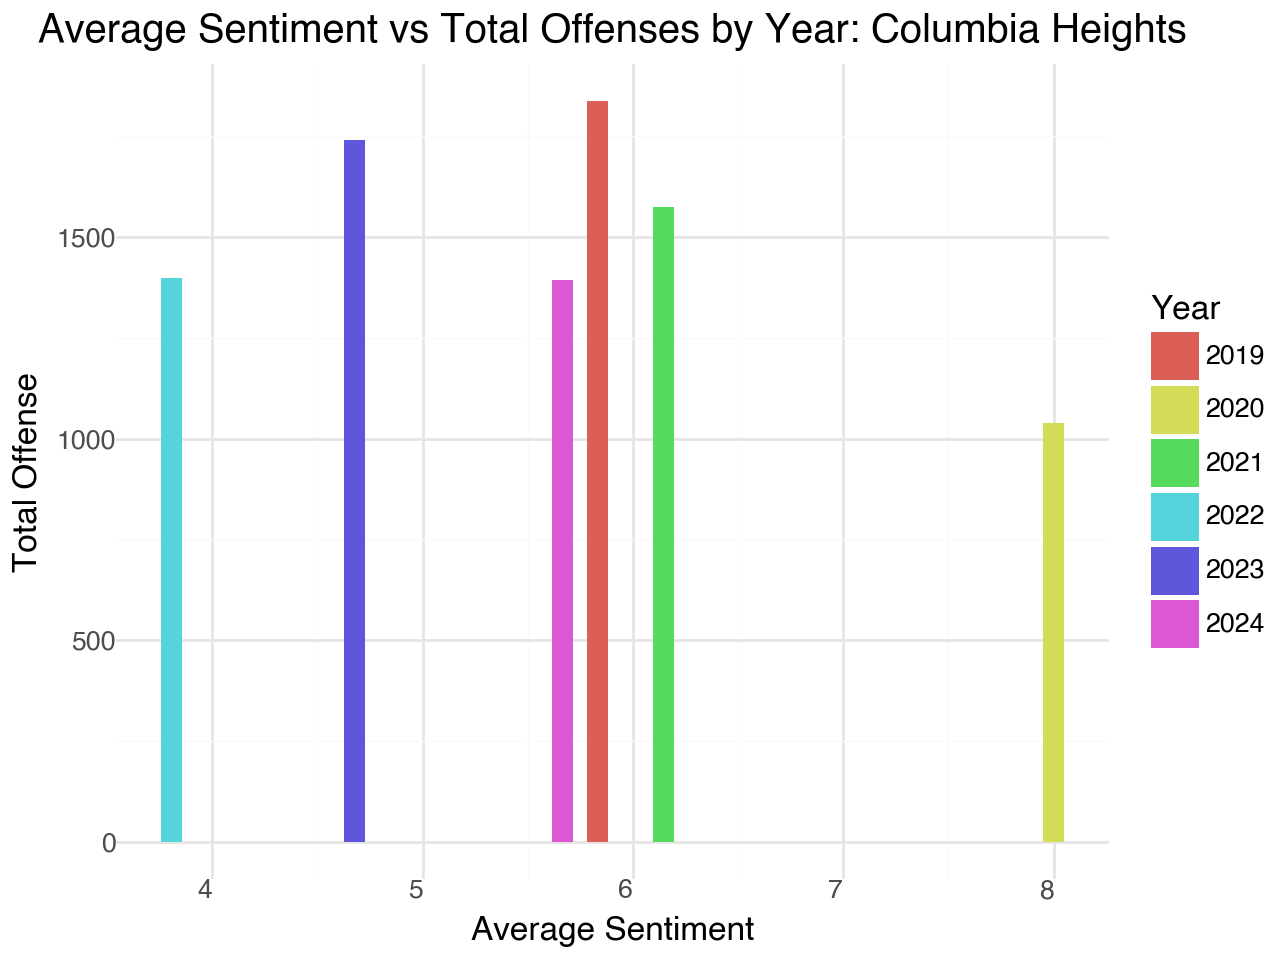

In [21]:
##Create a bar graph to show the trends in average sentiment vs actual crime in Shaw
shaw_sentiment_plot = (ggplot(data=merged_df) +
    # Bar for Average Sentiment
    geom_bar(aes(x="average_sentiment", fill = "year"), 
             stat="count", width=0.10) +
    
    # Theme and adjustments
    theme_minimal(base_size=12) + 
    theme(axis_text_x=element_text(hjust=1)) +
    
    # Title and labels
    labs(x="Average Sentiment", y="Total Offense", title="Average Sentiment vs Total Offenses by Year: Columbia Heights", fill="Year")
)

shaw_sentiment_plot

In [22]:
##create a count_df that groups the merged df by sentiment and year to get the counts by year for actual crime
count_df = (
    merged_df.groupby(['average_sentiment', 'year'])
    .size()
    .reset_index(name='count')
)
##scale the actual crime by 1000 for graphing purposes and show the first few rows
count_df['crime_scaled'] = count_df['count'] / 1000
count_df.head()

,average_sentiment,year,count,crime_scaled
0,3.807692,2022,1398,1.398
1,4.674663,2023,1740,1.740
2,5.664683,2024,1394,1.394
3,5.833333,2019,1837,1.837
4,6.145833,2021,1573,1.573


In [23]:
##put the year as a category for graphing purposes
count_df['year'] = count_df['year'].astype('category')

In [24]:
##show the first few rows
count_df.head()

,average_sentiment,year,count,crime_scaled
0,3.807692,2022,1398,1.398
1,4.674663,2023,1740,1.740
2,5.664683,2024,1394,1.394
3,5.833333,2019,1837,1.837
4,6.145833,2021,1573,1.573


In [25]:
##melt the dataframe to get a metric column that puts crime and sentiment in one column for ease of graphing
count_df_melted = count_df.melt(id_vars=["year"], 
                                value_vars=["average_sentiment", "crime_scaled"],
                                var_name="Metric", 
                                value_name="Value")

##show the last few rows
count_df_melted.tail()

,year,Metric,Value
7,2023,crime_scaled,1.740
8,2024,crime_scaled,1.394
9,2019,crime_scaled,1.837
10,2021,crime_scaled,1.573
11,2020,crime_scaled,1.038


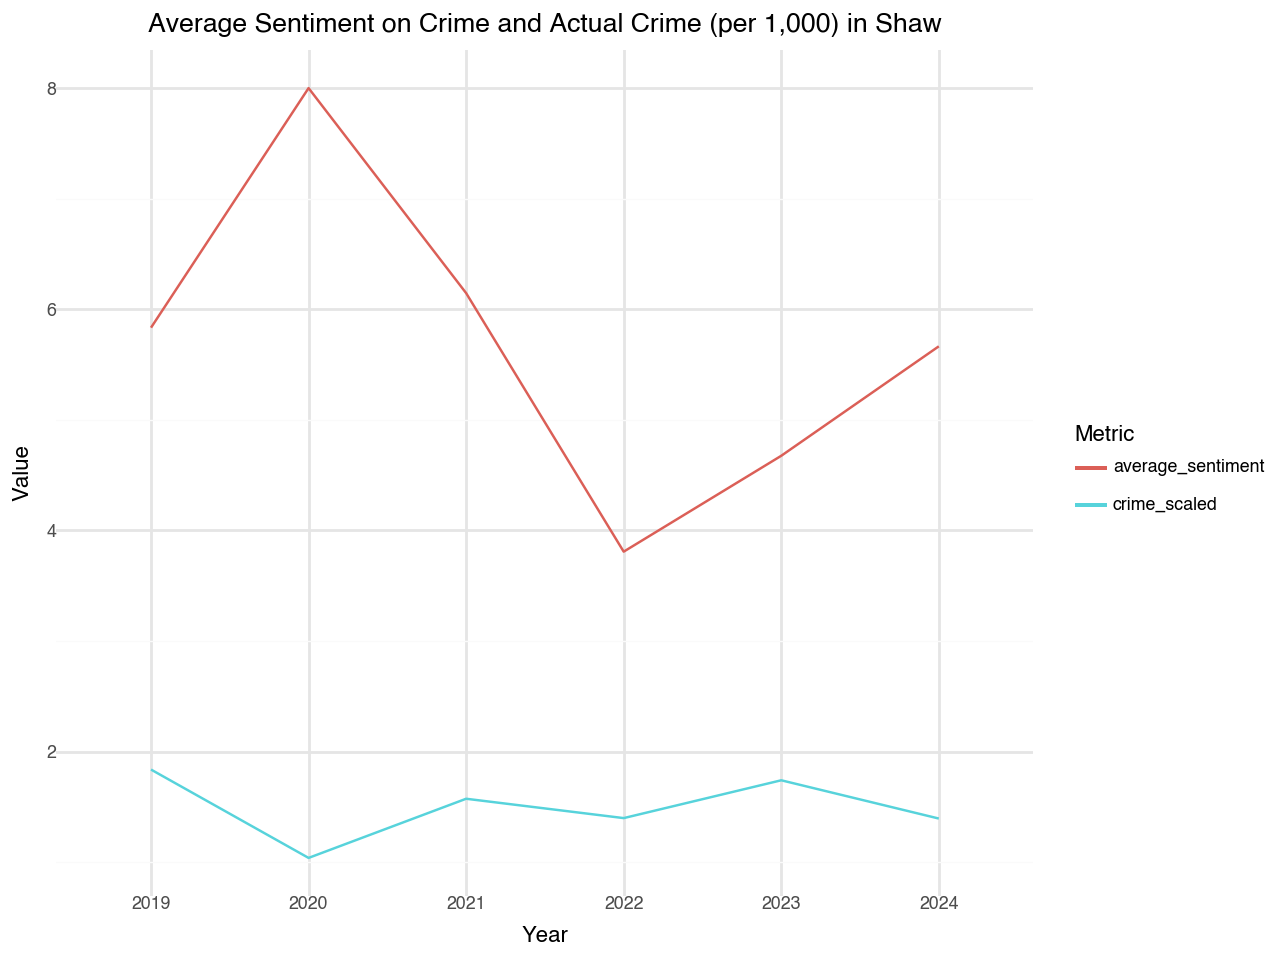

In [26]:
##graph shaw sentiment and actual crime trends using two line graphs
shaw_sentiment = (ggplot(data=count_df_melted) + 
                  
    geom_line(aes(x="year", y="Value", color="Metric", group="Metric")) + ## Year on x-axis and the value of either sentiment or crime on the y-axis. color by sentiment or crime

    theme_minimal(base_size=8) + ##theme

##labels for x and y axis, title and legend
labs(x="Year", title="Average Sentiment on Crime and Actual Crime (per 1,000) in Shaw", color = "Metric"))

shaw_sentiment

In [27]:
##Save bar graph as png
ggsave(shaw_sentiment_plot, "../../figures/shaw_crime.png")

In [28]:
##Save line graph as png
ggsave(shaw_sentiment, "../../figures/shaw_crime_line.png")

#### Clean and plot data for a second neighborhood

In [30]:
##filter the actual crime data to only columbia heights and show the first few rows
crime_columbia_heights = combined_crime[combined_crime["Name"] == "Columbia Heights"]
crime_columbia_heights.head()

,OFFENSE,Name,YEAR,TotalNeighborhoodCrime,Name_lower
1,THEFT/OTHER,Columbia Heights,2024,1545,columbia heights
6,ROBBERY,Columbia Heights,2024,1545,columbia heights
14,THEFT F/AUTO,Columbia Heights,2024,1545,columbia heights
18,MOTOR VEHICLE THEFT,Columbia Heights,2024,1545,columbia heights
20,ROBBERY,Columbia Heights,2024,1545,columbia heights


In [31]:
##filter the sentiments dataframe to only show columbia heights data. show the first few rows
sentiments_columbia_heights = sentiments[sentiments["neighborhood"] == "columbia heights"]
sentiments_columbia_heights.head()

,neighborhood,year,average_sentiment,date,Name_lower
14,columbia heights,2019,4.357143,2019-07-17 06:00:00.000000000,columbia heights
15,columbia heights,2020,4.000000,2020-11-01 00:00:00.000000000,columbia heights
16,columbia heights,2021,4.562925,2021-08-31 13:42:51.428571392,columbia heights
17,columbia heights,2022,3.373333,2022-05-08 09:36:00.000000000,columbia heights
18,columbia heights,2023,4.224053,2023-08-04 18:00:00.000000000,columbia heights


In [32]:
##merge the actual crime and crime sentiments dataframes by year and show the first few rows
merged_df_2 = crime_columbia_heights.merge(sentiments_columbia_heights,left_on="YEAR",right_on="year", how='inner')
merged_df_2.head()

,OFFENSE,Name,YEAR,TotalNeighborhoodCrime,Name_lower_x,neighborhood,year,average_sentiment,date,Name_lower_y
0,THEFT/OTHER,Columbia Heights,2024,1545,columbia heights,columbia heights,2024,4.836393,2024-06-11 05:20:00.000000000,columbia heights
1,ROBBERY,Columbia Heights,2024,1545,columbia heights,columbia heights,2024,4.836393,2024-06-11 05:20:00.000000000,columbia heights
2,THEFT F/AUTO,Columbia Heights,2024,1545,columbia heights,columbia heights,2024,4.836393,2024-06-11 05:20:00.000000000,columbia heights
3,MOTOR VEHICLE THEFT,Columbia Heights,2024,1545,columbia heights,columbia heights,2024,4.836393,2024-06-11 05:20:00.000000000,columbia heights
4,ROBBERY,Columbia Heights,2024,1545,columbia heights,columbia heights,2024,4.836393,2024-06-11 05:20:00.000000000,columbia heights


In [33]:
##convert year to a string for graphing purposes
merged_df_2['year'] = merged_df_2['year'].astype(str)

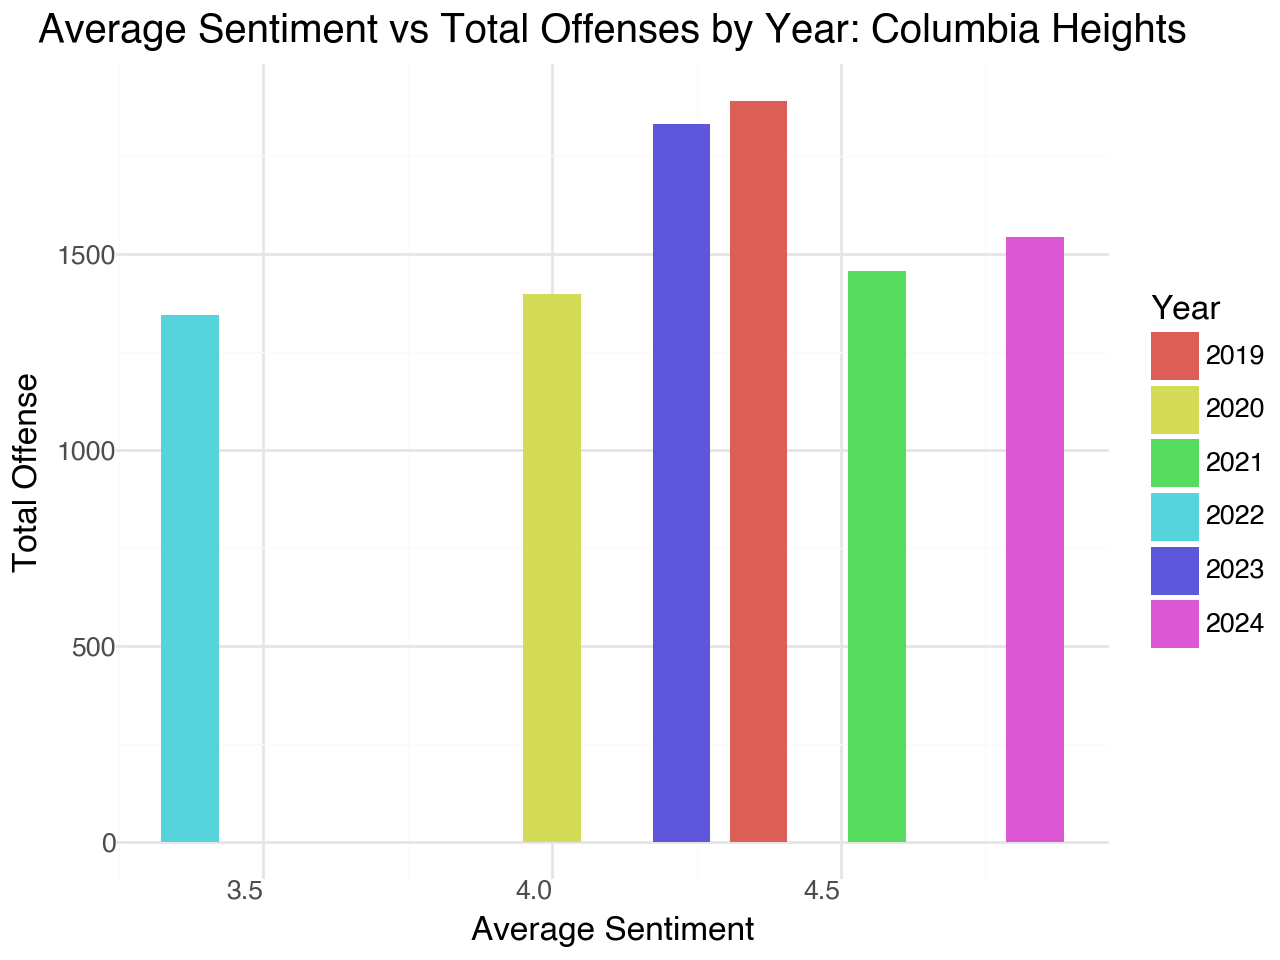

In [34]:
##bar graph for columbia heights trends in sentiment on crime vs actual crime by year
columbia_heights_sentiment_plot = (ggplot(data=merged_df_2) +
    # Bar for Average Sentiment
    geom_bar(aes(x="average_sentiment", fill = "year"), 
             stat="count", width=0.10) +
    
    # Theme and adjustments
    theme_minimal(base_size=12) + 
    theme(axis_text_x=element_text(hjust=1)) +
    
    # Title and labels
    labs(x="Average Sentiment", y="Total Offense", title="Average Sentiment vs Total Offenses by Year: Columbia Heights", fill="Year")
)

columbia_heights_sentiment_plot

In [35]:
##create a count_df that groups the merged df by sentiment and year to get the counts by year for actual crime
count_df2 = (
    merged_df_2.groupby(['average_sentiment', 'year'])
    .size()
    .reset_index(name='count')
)
##scale the actual crime by 1000 for graphing purposes and show the first few rows
count_df2['crime_scaled'] = count_df2['count'] / 1000
count_df2.head()

,average_sentiment,year,count,crime_scaled
0,3.373333,2022,1345,1.345
1,4.000000,2020,1400,1.400
2,4.224053,2023,1833,1.833
3,4.357143,2019,1892,1.892
4,4.562925,2021,1457,1.457


In [36]:
##put the year as a category for graphing purposes
count_df2['year'] = count_df2['year'].astype('category')

In [37]:
##melt the dataframe to get a metric column that puts crime and sentiment in one column for ease of graphing
count_df_melted2 = count_df2.melt(id_vars=["year"], 
                                value_vars=["average_sentiment", "crime_scaled"],
                                var_name="Metric", 
                                value_name="Value")

##show the last few rows
count_df_melted2.tail()

,year,Metric,Value
7,2020,crime_scaled,1.400
8,2023,crime_scaled,1.833
9,2019,crime_scaled,1.892
10,2021,crime_scaled,1.457
11,2024,crime_scaled,1.545


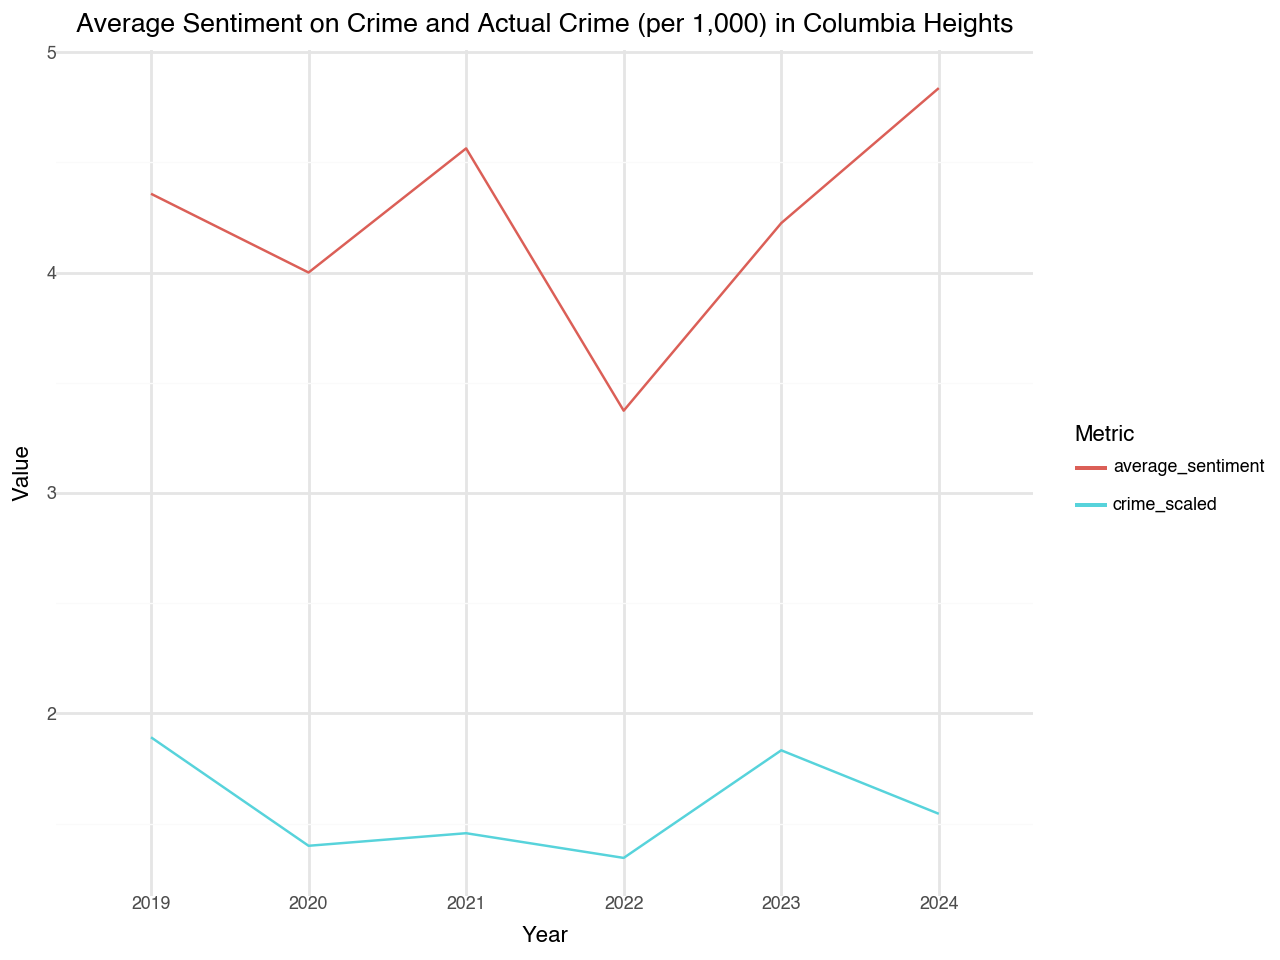

In [76]:
##graph shaw sentiment and actual crime trends using two line graphs
columbia_heights_sentiment = (ggplot(data=count_df_melted2) + 
                  
    geom_line(aes(x="year", y="Value", color="Metric", group="Metric")) + ## Year on x-axis and the value of either sentiment or crime on the y-axis. color by sentiment or crime

    theme_minimal(base_size=8) + ##theme

##labels for x and y axis, title and legend
labs(x="Year", title="Average Sentiment on Crime and Actual Crime (per 1,000) in Columbia Heights", color = "Metric"))

columbia_heights_sentiment

In [39]:
ggsave(columbia_heights_sentiment_plot, "../../figures/columbia_heights_crime.png")

In [78]:
ggsave(columbia_heights_sentiment, "../../figures/columbia_heights_crime_line.png")